# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print (xs,'\n')
print (xs.index,'\n')
# Values of the Series are actually a numpy array
print (xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')

a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')    # these operations are "safe", in the sense that if 
                                            # the program finds a Nan, it doesn't count it for the mean

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Note that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and nparray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
s[1:] + s[:-1]    # Sto sommando gli ultimi 4 elementi con i primi 4, ma mantenendo le posizioni
                    # quindi tale operazione non è definita per il primo e l'ultimo elemento

a         NaN
b   -1.052659
c   -1.704796
d    3.140643
e         NaN
dtype: float64

### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print (date)
date = dt.datetime(2018,11,19,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 19 2018'
print (date)
date = '19/11/2018 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2018-11-19
2018-11-19 14:45:10.000015
Nov 19 2018
19/11/2018 14:45:00
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-20 14:45:00',
               '2018-11-21 14:45:00', '2018-11-22 14:45:00',
               '2018-11-23 14:45:00', '2018-11-24 14:45:00',
               '2018-11-25 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 14:45:01',
               '2018-11-19 14:45:02', '2018-11-19 14:45:03',
               '2018-11-19 14:45:04', '2018-11-19 14:45:05',
               '2018-11-19 14:45:06', '2018-11-19 14:45:07',
               '2018-11-19 14:45:08', '2018-11-19 14:45:09',
               ...
               '2018-11-19 15:44:50', '2018-11-19 15:44:51',
               '2018-11-19 15:44:52', '2018-11-19 15:44:53',
               '2018-11-19 15:44:54', '2018-11-19 15:44:55',
               '2018-11-19 15:44:56', '2018-11-19 15:44:57',
               '2018-11-19 15:44:58', '2018-11-19 15:44:59'],
              dtype='datetime6

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [7]:
tstamp = pd.Timestamp(dt.date.today())

# internally it counts the microseconds from January 1st 1970
tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
print (pd.to_datetime('2010/11/12', format='%Y/%m/%d'))
print (pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M'))


1000
2010-11-12 00:00:00
2010-11-12 00:00:00


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2018/11/19':'2018/11/21'], '\n') # Note - includes end time


2018-11-19 14:45:00    11.373830
2018-11-20 14:45:00     9.406672
2018-11-21 14:45:00     8.989270
2018-11-22 14:45:00     8.486641
Freq: D, dtype: float64 

2018-11-19 14:45:00    11.373830
2018-11-20 14:45:00     9.406672
2018-11-21 14:45:00     8.989270
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('19/11/2018 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
# In pratica np.random.randn restituisce un array di valori 
df


,A,B,C,D
2018-11-19 14:45:00,-3.354488,3.303874,-0.591051,1.274532
2018-11-19 15:45:00,-0.213398,1.441864,0.161522,0.626103
2018-11-19 16:45:00,-0.507037,1.237914,0.615493,-0.717664
2018-11-19 17:45:00,0.097232,0.562727,1.154879,-0.068109
2018-11-19 18:45:00,0.479338,0.760743,1.665952,1.053261
2018-11-19 19:45:00,1.178315,-0.033125,-0.182094,0.212358
2018-11-19 20:45:00,-0.879632,0.313754,-0.796973,0.226210
2018-11-19 21:45:00,1.744912,0.648782,0.185330,-1.166824
2018-11-19 22:45:00,0.370742,-3.152564,-0.850792,0.099100
2018-11-19 23:45:00,-0.101831,-1.508719,0.790349,-1.499329


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('2013-01-02'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
   

In [12]:
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [13]:
df.head()

,A,B,C,D
2018-11-19 14:45:00,-3.354488,3.303874,-0.591051,1.274532
2018-11-19 15:45:00,-0.213398,1.441864,0.161522,0.626103
2018-11-19 16:45:00,-0.507037,1.237914,0.615493,-0.717664
2018-11-19 17:45:00,0.097232,0.562727,1.154879,-0.068109
2018-11-19 18:45:00,0.479338,0.760743,1.665952,1.053261


In [14]:
df.tail(4)

,A,B,C,D
2018-11-19 20:45:00,-0.879632,0.313754,-0.796973,0.226210
2018-11-19 21:45:00,1.744912,0.648782,0.185330,-1.166824
2018-11-19 22:45:00,0.370742,-3.152564,-0.850792,0.099100
2018-11-19 23:45:00,-0.101831,-1.508719,0.790349,-1.499329


In [15]:
df.index

DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 15:45:00',
               '2018-11-19 16:45:00', '2018-11-19 17:45:00',
               '2018-11-19 18:45:00', '2018-11-19 19:45:00',
               '2018-11-19 20:45:00', '2018-11-19 21:45:00',
               '2018-11-19 22:45:00', '2018-11-19 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[-3.35448839,  3.30387414, -0.59105127,  1.27453169],
       [-0.21339825,  1.44186443,  0.16152196,  0.62610349],
       [-0.50703728,  1.23791445,  0.61549345, -0.71766448],
       [ 0.09723199,  0.5627267 ,  1.1548787 , -0.06810905],
       [ 0.47933764,  0.76074266,  1.66595174,  1.0532607 ],
       [ 1.1783147 , -0.03312544, -0.18209385,  0.21235779],
       [-0.87963192,  0.31375398, -0.79697311,  0.22620957],
       [ 1.7449117 ,  0.6487816 ,  0.18533029, -1.16682424],
       [ 0.37074151, -3.15256423, -0.85079249,  0.09909983],
       [-0.10183069, -1.508719  ,  0.79034892, -1.4993294 ]])

In [18]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.118585,0.357525,0.215261,0.003964
std,1.374713,1.728181,0.846640,0.904364
min,-3.354488,-3.152564,-0.850792,-1.499329
25%,-0.433628,0.053594,-0.488812,-0.555276
50%,-0.002299,0.605754,0.173426,0.155729
75%,0.452189,1.118622,0.746635,0.526130
max,1.744912,3.303874,1.665952,1.274532


In [19]:
df.T

,2018-11-19 14:45:00,2018-11-19 15:45:00,2018-11-19 16:45:00,2018-11-19 17:45:00,2018-11-19 18:45:00,2018-11-19 19:45:00,2018-11-19 20:45:00,2018-11-19 21:45:00,2018-11-19 22:45:00,2018-11-19 23:45:00
A,-3.354488,-0.213398,-0.507037,0.097232,0.479338,1.178315,-0.879632,1.744912,0.370742,-0.101831
B,3.303874,1.441864,1.237914,0.562727,0.760743,-0.033125,0.313754,0.648782,-3.152564,-1.508719
C,-0.591051,0.161522,0.615493,1.154879,1.665952,-0.182094,-0.796973,0.185330,-0.850792,0.790349
D,1.274532,0.626103,-0.717664,-0.068109,1.053261,0.212358,0.226210,-1.166824,0.099100,-1.499329


In [20]:
df.sort_index(axis=1,ascending=True)

,A,B,C,D
2018-11-19 14:45:00,-3.354488,3.303874,-0.591051,1.274532
2018-11-19 15:45:00,-0.213398,1.441864,0.161522,0.626103
2018-11-19 16:45:00,-0.507037,1.237914,0.615493,-0.717664
2018-11-19 17:45:00,0.097232,0.562727,1.154879,-0.068109
2018-11-19 18:45:00,0.479338,0.760743,1.665952,1.053261
2018-11-19 19:45:00,1.178315,-0.033125,-0.182094,0.212358
2018-11-19 20:45:00,-0.879632,0.313754,-0.796973,0.226210
2018-11-19 21:45:00,1.744912,0.648782,0.185330,-1.166824
2018-11-19 22:45:00,0.370742,-3.152564,-0.850792,0.099100
2018-11-19 23:45:00,-0.101831,-1.508719,0.790349,-1.499329


In [21]:
df.sort_values(by="C")

,A,B,C,D
2018-11-19 22:45:00,0.370742,-3.152564,-0.850792,0.099100
2018-11-19 20:45:00,-0.879632,0.313754,-0.796973,0.226210
2018-11-19 14:45:00,-3.354488,3.303874,-0.591051,1.274532
2018-11-19 19:45:00,1.178315,-0.033125,-0.182094,0.212358
2018-11-19 15:45:00,-0.213398,1.441864,0.161522,0.626103
2018-11-19 21:45:00,1.744912,0.648782,0.185330,-1.166824
2018-11-19 16:45:00,-0.507037,1.237914,0.615493,-0.717664
2018-11-19 23:45:00,-0.101831,-1.508719,0.790349,-1.499329
2018-11-19 17:45:00,0.097232,0.562727,1.154879,-0.068109
2018-11-19 18:45:00,0.479338,0.760743,1.665952,1.053261


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [22]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2018-11-19 14:45:00   -3.354488
2018-11-19 15:45:00   -0.213398
2018-11-19 16:45:00   -0.507037
2018-11-19 17:45:00    0.097232
2018-11-19 18:45:00    0.479338
2018-11-19 19:45:00    1.178315
2018-11-19 20:45:00   -0.879632
2018-11-19 21:45:00    1.744912
2018-11-19 22:45:00    0.370742
2018-11-19 23:45:00   -0.101831
Freq: H, Name: A, dtype: float64 

2018-11-19 14:45:00   -3.354488
2018-11-19 15:45:00   -0.213398
2018-11-19 16:45:00   -0.507037
2018-11-19 17:45:00    0.097232
2018-11-19 18:45:00    0.479338
2018-11-19 19:45:00    1.178315
2018-11-19 20:45:00   -0.879632
2018-11-19 21:45:00    1.744912
2018-11-19 22:45:00    0.370742
2018-11-19 23:45:00   -0.101831
Freq: H, Name: A, dtype: float64


In [23]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2018-11-19 14:45:00":"2018-11-19 16:45:00"])

                            A         B         C         D
2018-11-19 14:45:00 -3.354488  3.303874 -0.591051  1.274532
2018-11-19 15:45:00 -0.213398  1.441864  0.161522  0.626103
2018-11-19 16:45:00 -0.507037  1.237914  0.615493 -0.717664
                            A         B         C         D
2018-11-19 14:45:00 -3.354488  3.303874 -0.591051  1.274532
2018-11-19 15:45:00 -0.213398  1.441864  0.161522  0.626103
2018-11-19 16:45:00 -0.507037  1.237914  0.615493 -0.717664


### Selection by label

In [24]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]    # Prende l'elemento 0 (il primo) di ogni colonna (in pratica prendo la prima riga)

A   -3.354488
B    3.303874
C   -0.591051
D    1.274532
Name: 2018-11-19 14:45:00, dtype: float64

In [25]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]    # prendo tuttele righe, e le colonne A e B

,A,B
2018-11-19 14:45:00,-3.354488,3.303874
2018-11-19 15:45:00,-0.213398,1.441864
2018-11-19 16:45:00,-0.507037,1.237914
2018-11-19 17:45:00,0.097232,0.562727
2018-11-19 18:45:00,0.479338,0.760743
2018-11-19 19:45:00,1.178315,-0.033125
2018-11-19 20:45:00,-0.879632,0.313754
2018-11-19 21:45:00,1.744912,0.648782
2018-11-19 22:45:00,0.370742,-3.152564
2018-11-19 23:45:00,-0.101831,-1.508719


In [26]:
# Showing label slicing, both endpoints are included:
df.loc['2018-11-19 18:45:00':'2018-11-19 20:45:00',['A','B']]

,A,B
2018-11-19 18:45:00,0.479338,0.760743
2018-11-19 19:45:00,1.178315,-0.033125
2018-11-19 20:45:00,-0.879632,0.313754


In [27]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.21339825348049934
-0.21339825348049934


### Selecting by position

In [28]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')    # prendo la quarta riga

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.097232
B    0.562727
C    1.154879
D   -0.068109
Name: 2018-11-19 17:45:00, dtype: float64 

                            A         B
2018-11-19 17:45:00  0.097232  0.562727
2018-11-19 18:45:00  0.479338  0.760743


In [29]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2018-11-19 15:45:00,-0.213398,0.161522
2018-11-19 16:45:00,-0.507037,0.615493
2018-11-19 18:45:00,0.479338,1.665952


In [30]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2018-11-19 15:45:00 -0.213398  1.441864  0.161522  0.626103
2018-11-19 16:45:00 -0.507037  1.237914  0.615493 -0.717664 

                            B         C
2018-11-19 14:45:00  3.303874 -0.591051
2018-11-19 15:45:00  1.441864  0.161522
2018-11-19 16:45:00  1.237914  0.615493
2018-11-19 17:45:00  0.562727  1.154879
2018-11-19 18:45:00  0.760743  1.665952
2018-11-19 19:45:00 -0.033125 -0.182094
2018-11-19 20:45:00  0.313754 -0.796973
2018-11-19 21:45:00  0.648782  0.185330
2018-11-19 22:45:00 -3.152564 -0.850792
2018-11-19 23:45:00 -1.508719  0.790349


In [31]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


1.441864429700237

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [32]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2018-11-19 14:45:00,-3.354488,3.303874,-0.591051,1.274532
2018-11-19 15:45:00,-0.213398,1.441864,0.161522,0.626103
2018-11-19 16:45:00,-0.507037,1.237914,0.615493,-0.717664
2018-11-19 17:45:00,0.097232,0.562727,1.154879,-0.068109
2018-11-19 18:45:00,0.479338,0.760743,1.665952,1.053261
2018-11-19 20:45:00,-0.879632,0.313754,-0.796973,0.226210
2018-11-19 21:45:00,1.744912,0.648782,0.185330,-1.166824


In [33]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2018-11-19 14:45:00,NaN,3.303874,NaN,1.274532
2018-11-19 15:45:00,NaN,1.441864,0.161522,0.626103
2018-11-19 16:45:00,NaN,1.237914,0.615493,NaN
2018-11-19 17:45:00,0.097232,0.562727,1.154879,NaN
2018-11-19 18:45:00,0.479338,0.760743,1.665952,1.053261
2018-11-19 19:45:00,1.178315,NaN,NaN,0.212358
2018-11-19 20:45:00,NaN,0.313754,NaN,0.226210
2018-11-19 21:45:00,1.744912,0.648782,0.185330,NaN
2018-11-19 22:45:00,0.370742,NaN,NaN,0.099100
2018-11-19 23:45:00,NaN,NaN,0.790349,NaN


### Setting

Combination of selection and setting of values

In [34]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [35]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,3.303874,-0.591051,5,0.0,0,1.000000
2018-11-19 15:45:00,-0.213398,1.441864,0.161522,5,0.5,2,0.999962
2018-11-19 16:45:00,-0.507037,1.237914,0.615493,5,1.0,4,0.999848
2018-11-19 17:45:00,0.097232,0.562727,1.154879,5,1.5,6,0.999657
2018-11-19 18:45:00,0.479338,0.760743,1.665952,5,2.0,8,0.999391
2018-11-19 19:45:00,1.178315,-0.033125,-0.182094,5,2.5,10,0.999048
2018-11-19 20:45:00,-0.879632,0.313754,-0.796973,5,3.0,12,0.998630
2018-11-19 21:45:00,1.744912,0.648782,0.185330,5,3.5,14,0.998135
2018-11-19 22:45:00,0.370742,-3.152564,-0.850792,5,4.0,16,0.997564
2018-11-19 23:45:00,-0.101831,-1.508719,0.790349,5,4.5,18,0.996917


In [36]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-3.303874,-0.591051,-5,0.0,0,-1.000000
2018-11-19 15:45:00,-0.213398,-1.441864,-0.161522,-5,-0.5,-2,-0.999962
2018-11-19 16:45:00,-0.507037,-1.237914,-0.615493,-5,-1.0,-4,-0.999848
2018-11-19 17:45:00,-0.097232,-0.562727,-1.154879,-5,-1.5,-6,-0.999657
2018-11-19 18:45:00,-0.479338,-0.760743,-1.665952,-5,-2.0,-8,-0.999391
2018-11-19 19:45:00,-1.178315,-0.033125,-0.182094,-5,-2.5,-10,-0.999048
2018-11-19 20:45:00,-0.879632,-0.313754,-0.796973,-5,-3.0,-12,-0.998630
2018-11-19 21:45:00,-1.744912,-0.648782,-0.185330,-5,-3.5,-14,-0.998135
2018-11-19 22:45:00,-0.370742,-3.152564,-0.850792,-5,-4.0,-16,-0.997564
2018-11-19 23:45:00,-0.101831,-1.508719,-0.790349,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [37]:
# Dropping by column
#df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2018-11-19 14:45:00,0.000000,3.303874,-0.591051,5,0.0,1.000000
2018-11-19 15:45:00,-0.213398,1.441864,0.161522,5,0.5,0.999962
2018-11-19 16:45:00,-0.507037,1.237914,0.615493,5,1.0,0.999848
2018-11-19 17:45:00,0.097232,0.562727,1.154879,5,1.5,0.999657
2018-11-19 18:45:00,0.479338,0.760743,1.665952,5,2.0,0.999391
2018-11-19 19:45:00,1.178315,-0.033125,-0.182094,5,2.5,0.999048
2018-11-19 20:45:00,-0.879632,0.313754,-0.796973,5,3.0,0.998630
2018-11-19 21:45:00,1.744912,0.648782,0.185330,5,3.5,0.998135
2018-11-19 22:45:00,0.370742,-3.152564,-0.850792,5,4.0,0.997564
2018-11-19 23:45:00,-0.101831,-1.508719,0.790349,5,4.5,0.996917


In [38]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,3.303874,-0.591051,5,0.0,0,1.000000
2018-11-19 19:45:00,1.178315,-0.033125,-0.182094,5,2.5,10,0.999048
2018-11-19 20:45:00,-0.879632,0.313754,-0.796973,5,3.0,12,0.998630
2018-11-19 21:45:00,1.744912,0.648782,0.185330,5,3.5,14,0.998135
2018-11-19 22:45:00,0.370742,-3.152564,-0.850792,5,4.0,16,0.997564
2018-11-19 23:45:00,-0.101831,-1.508719,0.790349,5,4.5,18,0.996917


In [39]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2018-11-19 22:45:00"))

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,3.303874,-0.591051,5,0.0,0,1.000000
2018-11-19 15:45:00,-0.213398,1.441864,0.161522,5,0.5,2,0.999962
2018-11-19 16:45:00,-0.507037,1.237914,0.615493,5,1.0,4,0.999848
2018-11-19 17:45:00,0.097232,0.562727,1.154879,5,1.5,6,0.999657
2018-11-19 18:45:00,0.479338,0.760743,1.665952,5,2.0,8,0.999391
2018-11-19 19:45:00,1.178315,-0.033125,-0.182094,5,2.5,10,0.999048
2018-11-19 20:45:00,-0.879632,0.313754,-0.796973,5,3.0,12,0.998630
2018-11-19 21:45:00,1.744912,0.648782,0.185330,5,3.5,14,0.998135
2018-11-19 23:45:00,-0.101831,-1.508719,0.790349,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [40]:
df_wNan = df[df>0].drop(['A', 'B', 'C'], axis=1)
df_wNan

,D,E,E prime,cosine
2018-11-19 14:45:00,5,NaN,NaN,1.000000
2018-11-19 15:45:00,5,0.5,2.0,0.999962
2018-11-19 16:45:00,5,1.0,4.0,0.999848
2018-11-19 17:45:00,5,1.5,6.0,0.999657
2018-11-19 18:45:00,5,2.0,8.0,0.999391
2018-11-19 19:45:00,5,2.5,10.0,0.999048
2018-11-19 20:45:00,5,3.0,12.0,0.998630
2018-11-19 21:45:00,5,3.5,14.0,0.998135
2018-11-19 22:45:00,5,4.0,16.0,0.997564
2018-11-19 23:45:00,5,4.5,18.0,0.996917


In [41]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,D,E,E prime,cosine
2018-11-19 15:45:00,5,0.5,2.0,0.999962
2018-11-19 16:45:00,5,1.0,4.0,0.999848
2018-11-19 17:45:00,5,1.5,6.0,0.999657
2018-11-19 18:45:00,5,2.0,8.0,0.999391
2018-11-19 19:45:00,5,2.5,10.0,0.999048
2018-11-19 20:45:00,5,3.0,12.0,0.998630
2018-11-19 21:45:00,5,3.5,14.0,0.998135
2018-11-19 22:45:00,5,4.0,16.0,0.997564
2018-11-19 23:45:00,5,4.5,18.0,0.996917


In [42]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,D,E,E prime,cosine
2018-11-19 14:45:00,False,True,True,False
2018-11-19 15:45:00,False,False,False,False
2018-11-19 16:45:00,False,False,False,False
2018-11-19 17:45:00,False,False,False,False
2018-11-19 18:45:00,False,False,False,False
2018-11-19 19:45:00,False,False,False,False
2018-11-19 20:45:00,False,False,False,False
2018-11-19 21:45:00,False,False,False,False
2018-11-19 22:45:00,False,False,False,False
2018-11-19 23:45:00,False,False,False,False


In [43]:
# filling missing data
df_wNan.fillna(value=0)    # dove c'è NaN ora metto zeri

,D,E,E prime,cosine
2018-11-19 14:45:00,5,0.0,0.0,1.000000
2018-11-19 15:45:00,5,0.5,2.0,0.999962
2018-11-19 16:45:00,5,1.0,4.0,0.999848
2018-11-19 17:45:00,5,1.5,6.0,0.999657
2018-11-19 18:45:00,5,2.0,8.0,0.999391
2018-11-19 19:45:00,5,2.5,10.0,0.999048
2018-11-19 20:45:00,5,3.0,12.0,0.998630
2018-11-19 21:45:00,5,3.5,14.0,0.998135
2018-11-19 22:45:00,5,4.0,16.0,0.997564
2018-11-19 23:45:00,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [44]:
df_wNan.fillna(method='pad')    # Extrapolating missing data (which that are NaN)

,D,E,E prime,cosine
2018-11-19 14:45:00,5,NaN,NaN,1.000000
2018-11-19 15:45:00,5,0.5,2.0,0.999962
2018-11-19 16:45:00,5,1.0,4.0,0.999848
2018-11-19 17:45:00,5,1.5,6.0,0.999657
2018-11-19 18:45:00,5,2.0,8.0,0.999391
2018-11-19 19:45:00,5,2.5,10.0,0.999048
2018-11-19 20:45:00,5,3.0,12.0,0.998630
2018-11-19 21:45:00,5,3.5,14.0,0.998135
2018-11-19 22:45:00,5,4.0,16.0,0.997564
2018-11-19 23:45:00,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [45]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.216864
B          0.357525
C          0.215261
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2018-11-19 14:45:00    1.244689
2018-11-19 15:45:00    1.412850
2018-11-19 16:45:00    1.763745
2018-11-19 17:45:00    2.187785
2018-11-19 18:45:00    2.700775
2018-11-19 19:45:00    2.780306
2018-11-19 20:45:00    2.805111
2018-11-19 21:45:00    3.725308
2018-11-19 22:45:00    3.194993
2018-11-19 23:45:00    3.953817
Freq: H, dtype: float64 



In [46]:
# global operations on columns
df.apply(np.cumsum)    # "cumulative sum"

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,3.303874,-0.591051,5,0.0,0,1.000000
2018-11-19 15:45:00,-0.213398,4.745739,-0.429529,10,0.5,2,1.999962
2018-11-19 16:45:00,-0.720436,5.983653,0.185964,15,1.5,6,2.999810
2018-11-19 17:45:00,-0.623204,6.546380,1.340843,20,3.0,12,3.999467
2018-11-19 18:45:00,-0.143866,7.307122,3.006795,25,5.0,20,4.998858
2018-11-19 19:45:00,1.034449,7.273997,2.824701,30,7.5,30,5.997906
2018-11-19 20:45:00,0.154817,7.587751,2.027728,35,10.5,42,6.996536
2018-11-19 21:45:00,1.899729,8.236533,2.213058,40,14.0,56,7.994670
2018-11-19 22:45:00,2.270470,5.083968,1.362265,45,18.0,72,8.992234
2018-11-19 23:45:00,2.168639,3.575249,2.152614,50,22.5,90,9.989152


In [47]:
df.apply(lambda x: x.max() - x.min(), axis = 0)

A           2.624544
B           6.456438
C           2.516744
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [48]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2018-11-19 14:45:00    3.303874
2018-11-19 15:45:00    1.228466
2018-11-19 16:45:00    0.730877
2018-11-19 17:45:00    0.659959
2018-11-19 18:45:00    1.240080
2018-11-19 19:45:00    1.145189
2018-11-19 20:45:00   -0.565878
2018-11-19 21:45:00    2.393693
2018-11-19 22:45:00   -2.781823
2018-11-19 23:45:00   -1.610550
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [49]:
file_name="/home/tommaso/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


Let's now do some operations among (elements of) columns

In [50]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [51]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

In [52]:
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,59371.666667
1,1,0,124,3869200167,2374,27,59372.500000
2,1,0,63,3869200167,2553,28,63848.333333
3,1,0,64,3869200167,2558,19,63965.833333
4,1,0,64,3869200167,2760,25,69020.833333
5,1,0,63,3869200167,2762,4,69053.333333
6,1,0,61,3869200167,2772,14,69311.666667
7,1,0,139,3869200167,2776,0,69400.000000
8,1,0,62,3869200167,2774,21,69367.500000
9,1,0,60,3869200167,2788,7,69705.833333


## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding raws) is straightforward


In [53]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,1.006070,0.785900,1.103711,-0.413713
1,-0.770115,0.593046,-0.064709,-1.017112
2,1.083434,-1.437357,-0.187924,0.629856
3,-0.033193,0.521256,-1.136654,0.901530
4,-0.442448,-0.074189,0.533281,1.029836
5,-1.874347,-1.639359,0.751545,-0.156169
6,-0.291464,0.670197,-0.588260,0.940719
7,0.205002,0.372170,0.773374,-0.571791
8,0.413518,0.701006,1.102100,-0.302752
9,1.110907,1.189966,0.458523,-0.814154


In [54]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  1.006070  0.785900  1.103711 -0.413713
 1 -0.770115  0.593046 -0.064709 -1.017112
 2  1.083434 -1.437357 -0.187924  0.629856,
           0         1         2         3
 3 -0.033193  0.521256 -1.136654  0.901530
 4 -0.442448 -0.074189  0.533281  1.029836
 5 -1.874347 -1.639359  0.751545 -0.156169
 6 -0.291464  0.670197 -0.588260  0.940719,
           0         1         2         3
 7  0.205002  0.372170  0.773374 -0.571791
 8  0.413518  0.701006  1.102100 -0.302752
 9  1.110907  1.189966  0.458523 -0.814154]

In [55]:
# put it back together
pd.concat(pieces)

# indexes can be ignored
#pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,1.006070,0.785900,1.103711,-0.413713
1,-0.770115,0.593046,-0.064709,-1.017112
2,1.083434,-1.437357,-0.187924,0.629856
3,-0.033193,0.521256,-1.136654,0.901530
4,-0.442448,-0.074189,0.533281,1.029836
5,-1.874347,-1.639359,0.751545,-0.156169
6,-0.291464,0.670197,-0.588260,0.940719
7,0.205002,0.372170,0.773374,-0.571791
8,0.413518,0.701006,1.102100,-0.302752
9,1.110907,1.189966,0.458523,-0.814154


In [56]:
# appending a single raw (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)

,0,1,2,3
0,1.006070,0.785900,1.103711,-0.413713
1,-0.770115,0.593046,-0.064709,-1.017112
2,1.083434,-1.437357,-0.187924,0.629856
3,-0.033193,0.521256,-1.136654,0.901530
4,-0.442448,-0.074189,0.533281,1.029836
5,-1.874347,-1.639359,0.751545,-0.156169
6,-0.291464,0.670197,-0.588260,0.940719
7,0.205002,0.372170,0.773374,-0.571791
8,0.413518,0.701006,1.102100,-0.302752
9,1.110907,1.189966,0.458523,-0.814154


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [57]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [58]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-0.961896,1.066003
1,bar,one,0.489512,0.644544
2,foo,two,0.765217,0.272649
3,bar,three,-0.829263,-0.673322
4,foo,two,-0.927048,0.781189
5,bar,two,-0.727837,0.321100
6,foo,one,-0.636833,-0.018480
7,foo,three,0.212603,1.165202


In [59]:
# Grouping and then applying the sum()
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()    # chiaramente non ritorna la colonna B perche' non sono oggetti che si possono sommare

,C,D
A,,
bar,-1.067588,0.292321
foo,-1.547958,3.266564


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [60]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second']) 

first  second
bar    one      -0.276707
       two       0.340738
baz    one      -0.397931
       two      -0.166587
foo    one      -0.847581
       two      -2.325566
qux    one       0.784578
       two      -0.589644
dtype: float64


In [61]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.489512  0.644544
    three -0.829263 -0.673322
    two   -0.727837  0.321100
foo one   -1.598729  1.047524
    three  0.212603  1.165202
    two   -0.161831  1.053838

In [62]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    0.489512
            D    0.644544
     three  C   -0.829263
            D   -0.673322
     two    C   -0.727837
            D    0.321100
foo  one    C   -1.598729
            D    1.047524
     three  C    0.212603
            D    1.165202
     two    C   -0.161831
            D    1.053838
dtype: float64

## Plotting

Just a preview, more on the next lab class!

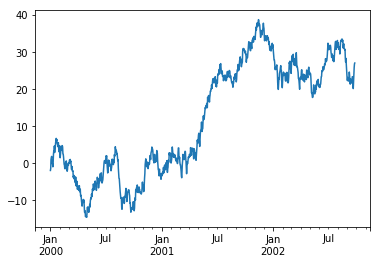

In [63]:
%matplotlib inline
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

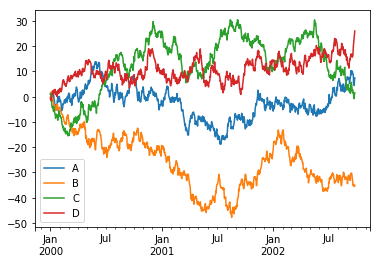

In [71]:
import matplotlib.pyplot as plt
pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')